<a href="https://colab.research.google.com/github/CC0R0NAD0/Segmentation-using-multiple-vision-machine-paradigms/blob/main/T2_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive  #Librería para accesar a archivos drive
import os  #Librería manejo del sistema

# Montar el archivo del drive (con previa autorización del usuario)
drive.mount('/content/drive', force_remount=True)

# Abrir el documento con la ruta de acceso personal predeterminada.
os.chdir("/content/drive/MyDrive/Sistemas_V/T2_Segmentacion")  #Cuenta carlos

#os.chdir("/content/drive/MyDrive/TEC/XIII Semestre/Sistemas_V/Mini_Proyecto") #Cuenta Adrián

Mounted at /content/drive


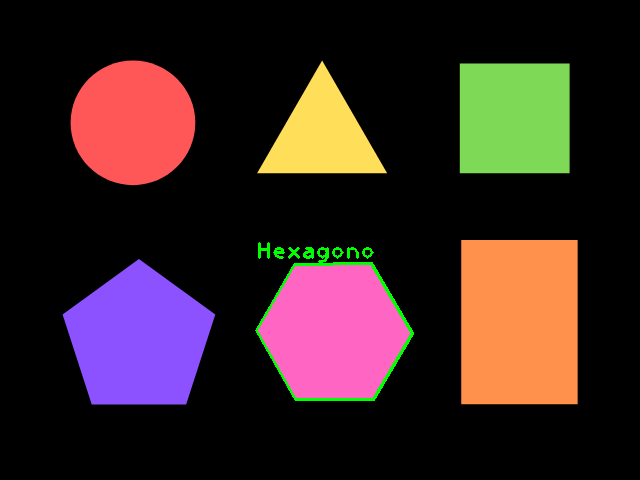

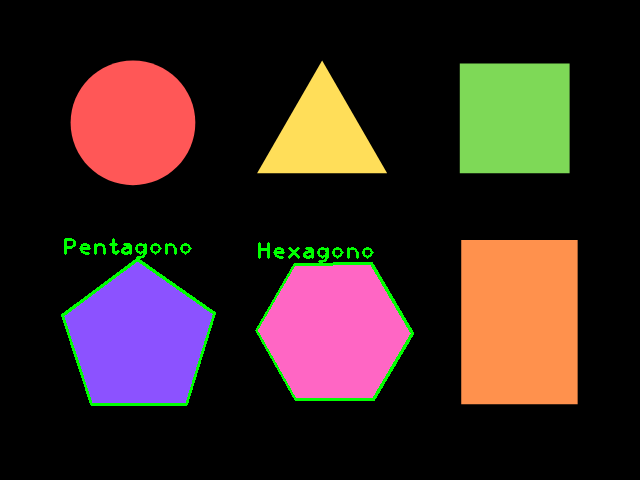

aspect_ratio=  0.7090909090909091


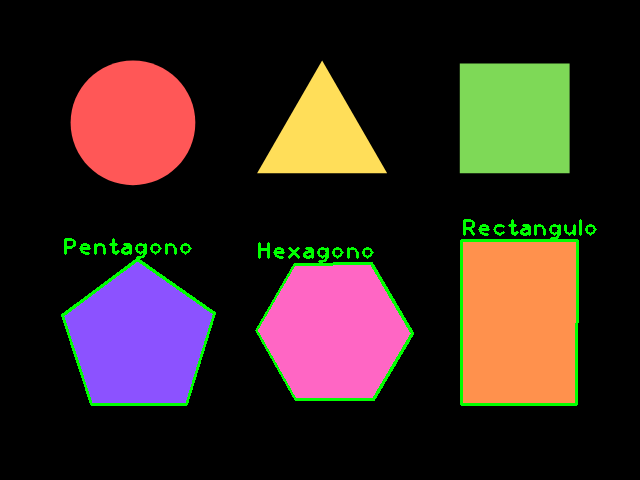

aspect_ratio=  1.0


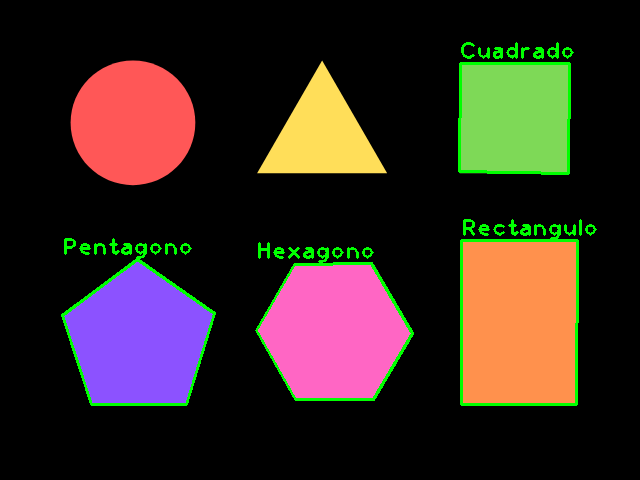

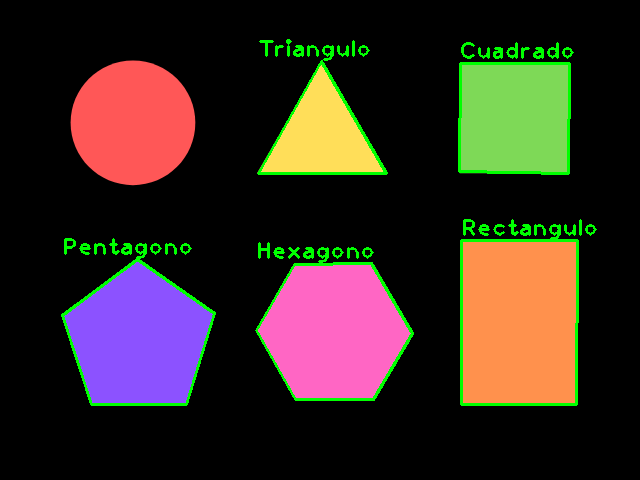

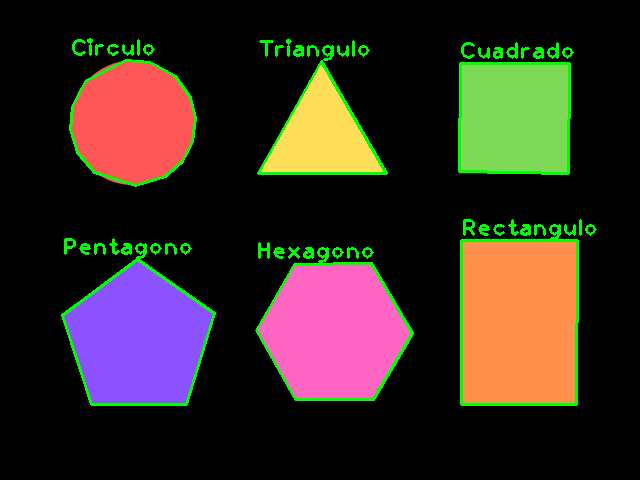

In [12]:
import cv2  # libreria trabajo con imagenes

from google.colab.patches import cv2_imshow # Se utiliza este parche para 
                                            # poder mostrar las imágenes en
                                            # pantalla


image = cv2.imread('imagenes/figurasColores.png')
image = cv2.imread('imagenes/figurasColores.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)
#_, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
#_,cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 3
cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 4
#cv2.drawContours(image, cnts, -1, (0,255,0), 2)
for c in cnts:
  epsilon = 0.01*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  #print(len(approx))
  x,y,w,h = cv2.boundingRect(approx)
  if len(approx)==3:
    cv2.putText(image,'Triangulo', (x,y-5),1,1.5,(0,255,0),2)
  if len(approx)==4:
    aspect_ratio = float(w)/h
    print('aspect_ratio= ', aspect_ratio)
    if aspect_ratio == 1:
      cv2.putText(image,'Cuadrado', (x,y-5),1,1.5,(0,255,0),2)
    else:
      cv2.putText(image,'Rectangulo', (x,y-5),1,1.5,(0,255,0),2)
  if len(approx)==5:
    cv2.putText(image,'Pentagono', (x,y-5),1,1.5,(0,255,0),2)
  if len(approx)==6:
    cv2.putText(image,'Hexagono', (x,y-5),1,1.5,(0,255,0),2)
  if len(approx)>10:
    cv2.putText(image,'Circulo', (x,y-5),1,1.5,(0,255,0),2)
  cv2.drawContours(image, [approx], 0, (0,255,0),2)
  cv2_imshow(image)
  cv2.waitKey(0)
